### Clustering explore exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = pd.read_csv('zillow.csv')

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,236,012,000.00",0.01,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
df.shape

(77574, 68)

In [4]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column * len(df.index),0))
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    threshold = int(round(prop_required_row * len(df.columns),0))
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    return df

cols_to_remove = ['id', 'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 
                  'heatingorsystemtypeid', 'propertycountylandusecode', 
                  'propertylandusetypeid','propertyzoningdesc', 'heatingorsystemdesc',
                  'censustractandblock', 'propertylandusedesc', 'unitcnt', 
                  'buildingqualitytypeid']

def remove_columns(df, cols_to_remove):  
    df = df.drop(columns = cols_to_remove)
    return df

In [5]:
single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]

df = df[df.propertylandusetypeid.isin(single_use)]
    
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]
df.shape

df = handle_missing_values(df)

df = remove_columns(df, cols_to_remove)

df.lotsizesquarefeet.fillna(7313, inplace = True)

df = df[df.taxvaluedollarcnt < 5_000_000]

df = df[df.calculatedfinishedsquarefeet < 8000]

df['county'] = np.where(df.fips == 6037, 'Los_Angeles', np.where(df.fips == 6059, 'Orange', 
                                   'Ventura')) 

df = df.dropna()

df.shape

(69680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69680 entries, 0 to 77573
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      69680 non-null  int64  
 1   bathroomcnt                   69680 non-null  float64
 2   bedroomcnt                    69680 non-null  float64
 3   calculatedfinishedsquarefeet  69680 non-null  float64
 4   fips                          69680 non-null  float64
 5   latitude                      69680 non-null  float64
 6   longitude                     69680 non-null  float64
 7   lotsizesquarefeet             69680 non-null  float64
 8   rawcensustractandblock        69680 non-null  float64
 9   regionidcity                  69680 non-null  float64
 10  regionidcounty                69680 non-null  float64
 11  regionidzip                   69680 non-null  float64
 12  roomcnt                       69680 non-null  float64
 13  y

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"69,680.00","13,007,027.68","2,124,344.13","10,711,855.00","11,543,999.00","12,589,844.50","14,256,248.25","162,960,814.00"
bathroomcnt,"69,680.00",2.25,0.91,1.00,2.00,2.00,3.00,10.00
bedroomcnt,"69,680.00",3.01,0.99,1.00,2.00,3.00,4.00,11.00
calculatedfinishedsquarefeet,"69,680.00","1,728.21",852.15,360.00,"1,164.00","1,506.00","2,046.00","7,970.00"
fips,"69,680.00","6,049.32",20.84,"6,037.00","6,037.00","6,037.00","6,059.00","6,111.00"
latitude,"69,680.00","34,002,600.18","268,090.43","33,339,527.00","33,803,881.75","34,012,875.50","34,174,473.50","34,818,767.00"
longitude,"69,680.00","-118,193,475.06","360,898.81","-119,475,265.00","-118,409,053.00","-118,162,984.50","-117,913,460.25","-117,572,338.00"
lotsizesquarefeet,"69,680.00","27,625.28","119,080.48",236.00,"6,000.00","7,313.00","10,642.50","6,971,010.00"
rawcensustractandblock,"69,680.00","60,496,173.19","206,833.39","60,371,011.10","60,373,115.00","60,376,206.01","60,590,524.18","61,110,091.00"
regionidcity,"69,680.00","33,494.85","46,570.58","3,491.00","12,447.00","25,218.00","45,457.00","396,556.00"


In [9]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size = .2, 
                                        random_state = 42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size = .3, 
                                   random_state = 42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  858440
validate observations:  367928
test observations:  306592


1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Initial Questions

 - Target Variable: logerror
 - What is the distribution of each variable?
 - Is logerror significantly different for properties different counties?

2. Answer those questions through a mix of statistical tests and visualizations.

    1. What is the distribution of each of the variables?

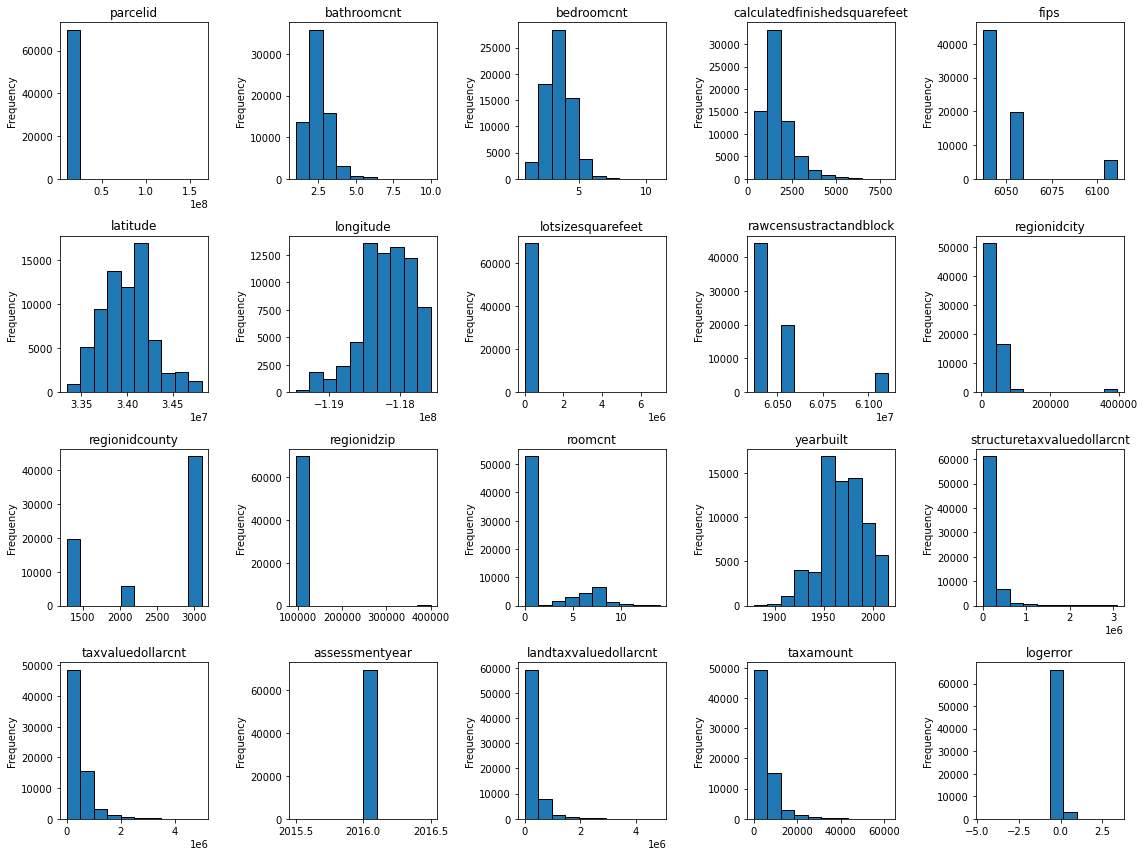

In [34]:
fig, axs = plt.subplots(4, 5, sharey = False, figsize = (16, 12))
axe = axs.ravel()
for i, col in enumerate(df.select_dtypes('number').columns):
    df[col].plot.hist(ax = axe[i], title = col, ec = 'black')
    plt.tight_layout()

    B. Is logerror significantly different for properties different counties?

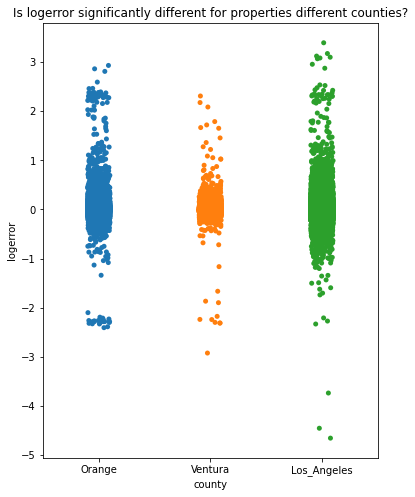

In [38]:
plt.figure(figsize = (6, 8))
sns.stripplot(x = df.county, y = df.logerror)
plt.title('Is logerror significantly different for properties different counties?');

H0: Logerror mean for each county is not different than the overall population mean.
Ha: Logerror mean for each county is different than the overall population mean.

In [49]:
stats.ttest_1samp(a = df.logerror[df.county == 'Los_Angeles'], popmean = df.logerror.mean(), alternative = 'two-sided')

Ttest_1sampResult(statistic=-2.6086725278467227, pvalue=0.009092480997130671)

In [46]:
stats.ttest_1samp(a = df.logerror[df.county == 'Orange'], popmean = df.logerror.mean(), alternative = 'two-sided')

Ttest_1sampResult(statistic=3.4086739884548023, pvalue=0.0006540925062263024)

In [47]:
stats.ttest_1samp(a = df.logerror[df.county == 'Ventura'], popmean = df.logerror.mean(), alternative = 'two-sided')

Ttest_1sampResult(statistic=-0.4063915350817186, pvalue=0.6844701870280764)

Conclusion:

Null applies to Ventura county
Alternative applies to Los Angeles and Orange counties

In [50]:
print('logerror mean:', df.logerror.mean())
print('logerror Los Angeles county mean: ', df.logerror[df.county == 'Los_Angeles'].mean())
print('logerror Orange county mean: ', df.logerror[df.county == 'Orange'].mean())
print('logerror Ventura county mean: ', df.logerror[df.county == 'Ventura'].mean())

logerror mean: 0.01657318803458508
logerror Los Angeles county mean:  0.014634891440226526
logerror Orange county mean:  0.02112287943970614
logerror Ventura county mean:  0.015751873334549207


In [56]:
geo_df = pd.read_csv('zillow.csv')

In [57]:
single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]

geo_df = geo_df[geo_df.propertylandusetypeid.isin(single_use)]
    
geo_df = geo_df[(geo_df.bedroomcnt > 0) & (geo_df.bathroomcnt > 0) & ((geo_df.unitcnt <= 1)|geo_df.unitcnt.isnull()) & (geo_df.calculatedfinishedsquarefeet > 350)]

geo_df = handle_missing_values(geo_df)

geo_df = remove_columns(geo_df, cols_to_remove)

geo_df.lotsizesquarefeet.fillna(7313, inplace = True)

geo_df = geo_df[geo_df.taxvaluedollarcnt < 5_000_000]

geo_df = geo_df[geo_df.calculatedfinishedsquarefeet < 8000]

geo_df['county'] = np.where(geo_df.fips == 6037, 'Los_Angeles', np.where(geo_df.fips == 6059, 'Orange', 
                                   'Ventura')) 

geo_df = geo_df.dropna()

geo_df.shape

(69680, 22)

In [59]:
geo_df['abs_log_error'] = geo_df.logerror.apply(lambda x: x if x >= 0 else -x)

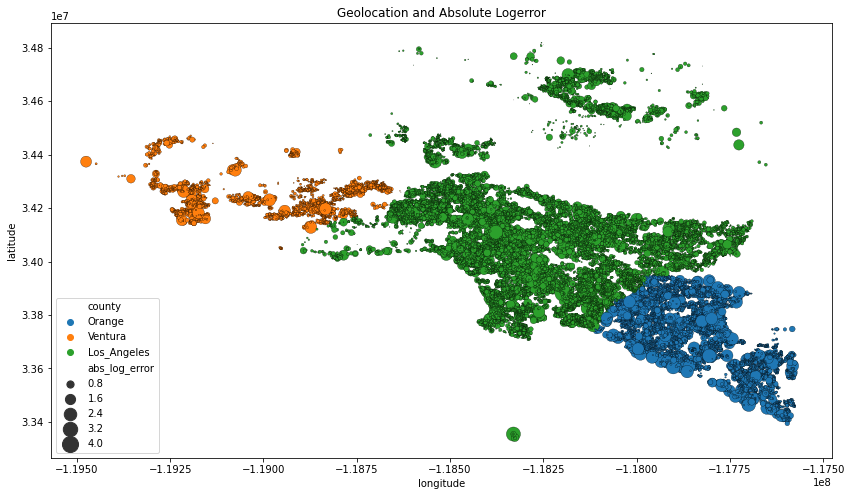

In [60]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_log_error', sizes=(0,300), ec='black', linewidth=0.25, data=geo_df)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

3. Bonus: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [53]:
u_zips = df.regionidzip.unique().tolist()

In [55]:
results = []
for z in u_zips:
    t, p = stats.ttest_1samp(df[df.regionidzip == z].logerror, df.logerror.mean(), alternative = 'two-sided')
    if p < 0.05:
        results.append(z)
print(results)

[96293.0, 96325.0, 96047.0, 97051.0, 96120.0, 96957.0, 96946.0, 96447.0, 96517.0, 96387.0, 96993.0, 96020.0, 96974.0, 96294.0, 96280.0, 97068.0, 95984.0, 96378.0, 96426.0, 96137.0, 96197.0, 97039.0, 96996.0, 96327.0, 96097.0, 96095.0, 96245.0, 96238.0, 96985.0, 96228.0, 96379.0, 96103.0, 96117.0, 96415.0, 96217.0, 96107.0, 96006.0, 96492.0, 96336.0, 96171.0, 96152.0, 95985.0, 96339.0, 96022.0, 96356.0, 96475.0, 96508.0, 96124.0, 96026.0, 96045.0, 96244.0, 95997.0, 95989.0, 96326.0, 96975.0, 96465.0, 96216.0, 96038.0, 96951.0, 96190.0, 96007.0, 96204.0, 96043.0, 97298.0, 95994.0]
